In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyttsx3

## Why play with language models on Romeo and Juliet when there is Eminem

### Eminem dataset

In [2]:
lose_yourself = '''
[Intro]
Look, if you had one shot or one opportunity
To seize everything you ever wanted in one moment
Would you capture it or just let it slip?
Yo

[Verse 1]
His palms are sweaty, knees weak, arms are heavy
There's vomit on his sweater already, mom's spaghetti
He's nervous, but on the surface, he looks calm and ready
To drop bombs, but he keeps on forgetting
What he wrote down, the whole crowd goes so loud
He opens his mouth, but the words won't come out
He's chokin', how? Everybody's jokin' now
The clock's run out, time's up, over, blaow
Snap back to reality, ope, there goes gravity
Ope, there goes Rabbit, he choked, he's so mad
But he won't give up that easy, no, he won't have it
He knows his whole back's to these ropes, it don't matter
He's dope, he knows that, but he's broke, he's so stagnant
He knows when he goes back to this mobile home, that's when it's
Back to the lab again, yo, this old rhapsody
Better go capture this moment and hope it don't pass him

[Chorus]
You better lose yourself in the music
The moment, you own it, you better never let it go (Go)
You only get one shot, do not miss your chance to blow
This opportunity comes once in a lifetime, yo
You better lose yourself in the music
The moment, you own it, you better never let it go (Go)
You only get one shot, do not miss your chance to blow
This opportunity comes once in a lifetime, yo
You better
See upcoming rap shows
Get tickets for your favorite artists
You might also like
Family Matters
Drake
So Long, London
Taylor Swift
Say Don’t Go (Taylor’s Version) [From The Vault]
Taylor Swift
[Verse 2]
His soul's escaping through this hole that is gaping
This world is mine for the taking, make me king
As we move toward a new world order
A normal life is boring, but superstardom's
Close to post-mortem, it only grows harder
Homie grows hotter, he blows, it's all over
These hoes is all on him, coast-to-coast shows
He's known as the Globetrotter, lonely roads
God only knows he's grown farther from home, he's no father
He goes home and barely knows his own daughter
But hold your nose 'cause here goes the cold water
These hoes don't want him no mo', he's cold product
They moved on to the next schmoe who flows
He nose-dove and sold nada, and so the soap opera
Is told, it unfolds, I suppose it's old, partner
But the beat goes on, da-da-dom, da-dom, dah-dah-dah-dah

[Chorus]
You better lose yourself in the music
The moment, you own it, you better never let it go (Go)
You only get one shot, do not miss your chance to blow
This opportunity comes once in a lifetime, yo
You better lose yourself in the music
The moment, you own it, you better never let it go (Go)
You only get one shot, do not miss your chance to blow
This opportunity comes once in a lifetime, yo
You better
[Verse 3]
No more games, I'ma change what you call rage
Tear this motherfuckin' roof off like two dogs caged
I was playin' in the beginning, the mood all changed
I've been chewed up and spit out and booed off stage
But I kept rhymin' and stepped right in the next cypher
Best believe somebody's payin' the Pied Piper
All the pain inside amplified by the
Fact that I can't get by with my nine-to-
Five and I can't provide the right type of life for my family
'Cause, man, these goddamn food stamps don't buy diapers
And there's no movie, there's no Mekhi Phifer, this is my life
And these times are so hard, and it's gettin' even harder
Tryna feed and water my seed, plus teeter-totter
Caught up between bein' a father and a prima donna
Baby-mama drama, screamin' on her, too much for me to wanna
Stay in one spot, another day of monotony's gotten me
To the point I'm like a snail, I've got
To formulate a plot or end up in jail or shot
Success is my only motherfuckin' option, failure's not
Mom, I love you, but this trailer's got
To go, I cannot grow old in Salem's Lot
So here I go, it's my shot; feet, fail me not
This may be the only opportunity that I got

[Chorus]
You better lose yourself in the music
The moment, you own it, you better never let it go (Go)
You only get one shot, do not miss your chance to blow
This opportunity comes once in a lifetime, yo
You better lose yourself in the music
The moment, you own it, you better never let it go (Go)
You only get one shot, do not miss your chance to blow
This opportunity comes once in a lifetime, yo
You better
[Outro]
You can do anything you set your mind to, man
        
'''


rap_god = '''
[Intro]
"Look, I was gonna go easy on you not to hurt your feelings"
"But I'm only going to get this one chance" (Six minutes—, six minutes—)
"Something's wrong, I can feel it" (Six minutes, Slim Shady, you're on!)
"Just a feeling I've got, like something's about to happen, but I don't know what. 
If that means what I think it means, we're in trouble, big trouble; 
And if he is as bananas as you say, I'm not taking any chances"
"You are just what the doc ordered"

[Chorus]
I'm beginnin' to feel like a Rap God, Rap God
All my people from the front to the back nod, back nod
Now, who thinks their arms are long enough to slap box, slap box?
They said I rap like a robot, so call me Rap-bot

[Verse 1]
But for me to rap like a computer it must be in my genes
I got a laptop in my back pocket
My pen'll go off when I half-cock it
Got a fat knot from that rap profit
Made a livin' and a killin' off it
Ever since Bill Clinton was still in office
With Monica Lewinsky feelin' on his nutsack
I'm an MC still as honest
But as rude and as indecent as all hell
Syllables, skill-a-holic (Kill 'em all with)
This flippity dippity-hippity hip-hop
You don't really wanna get into a pissin' match
With this rappity brat, packin' a MAC in the back of the Ac'
Backpack rap crap, yap-yap, yackety-yack
And at the exact same time, I attempt these lyrical acrobat stunts while I'm practicin' that
I'll still be able to break a motherfuckin' table
Over the back of a couple of faggots and crack it in half
Only realized it was ironic, I was signed to Aftermath after the fact
How could I not blow? All I do is drop F-bombs
Feel my wrath of attack
Rappers are havin' a rough time period, here's a maxi pad
It's actually disastrously bad for the wack
While I'm masterfully constructing this masterpièce
See upcoming rap shows
Get tickets for your favorite artists
You might also like
The Tortured Poets Department
Taylor Swift
Big Foot
Nicki Minaj
​euphoria
Kendrick Lamar
[Chorus]
'Cause I'm beginnin' to feel like a Rap God, Rap God
All my people from the front to the back nod, back nod
Now, who thinks their arms are long enough to slap box, slap box?
Let me show you maintainin' this shit ain't that hard, that hard
Everybody want the key and the secret to rap immortality like Ι have got

[Verse 2]
Well, to be truthful the blueprint's
Simply rage and youthful exuberance
Everybody loves to root for a nuisance
Hit the Earth like an asteroid
Did nothing but shoot for the Moon since (Pew!)
MCs get taken to school with this music
'Cause I use it as a vehicle to "bus the rhyme"
Now I lead a new school full of students
Me? I'm a product of Rakim
Lakim Shabazz, 2Pac, N.W.A, Cube, hey Doc, Ren
Yella, Eazy, thank you, they got Slim
Inspired enough to one day grow up, blow up and be in a position
To meet Run–D.M.C., and induct them
Into the motherfuckin' Rock and Roll Hall of Fame
Even though I'll walk in the church and burst in a ball of flames
Only Hall of Fame I'll be inducted in is the alcohol of fame
On the wall of shame
You fags think it's all a game, 'til I walk a flock of flames
Off a plank and, tell me what in the fuck are you thinkin'?
Little gay-lookin' boy
So gay I can barely say it with a straight face, lookin' boy (Ha-ha!)
You're witnessin' a mass-occur
Like you're watching a church gathering take place, lookin' boy
"Oy vey, that boy's gay!"—that's all they say, lookin' boy
You get a thumbs up, pat on the back
And a "way to go" from your label every day, lookin' boy
Hey, lookin' boy! What you say, lookin' boy?
I get a "hell yeah" from Dre, lookin' boy
I'ma work for everything I have, never asked nobody for shit
Get outta my face, lookin' boy!
Basically, boy, you're never gonna be capable
Of keepin' up with the same pace, lookin' boy, 'cause—
[Chorus]
I'm beginnin' to feel like a Rap God, Rap God
All my people from the front to the back nod, back nod
The way I'm racin' around the track, call me NASCAR, NASCAR
Dale Earnhardt of the trailer park, the White Trash God
Kneel before General Zod
This planet's Krypton—no, Asgard, Asgard

[Verse 3]
So you'll be Thor and I'll be Odin
You rodent, I'm omnipotent
Let off, then I'm reloadin'
Immediately with these bombs I'm totin'
And I should not be woken
I'm the walkin' dead, but I'm just a talkin' head, a zombie floatin'
But I got your mom deep-throatin'
I'm out my Ramen Noodle
We have nothin' in common, poodle
I'm a Doberman, pinch yourself in the arm and pay homage, pupil
It's me, my honesty's brutal
But it's honestly futile if I don't utilize what I do though
For good at least once in a while
So I wanna make sure somewhere in this chicken scratch I scribble and doodle enough rhymes
To maybe try to help get some people through tough times
But I gotta keep a few punchlines
Just in case 'cause even you unsigned
Rappers are hungry lookin' at me like it's lunchtime
I know there was a time where once I
Was king of the underground
But I still rap like I'm on my Pharoahe Monch grind
So I crunch rhymes, but sometimes when you combine
Appeal with the skin color of mine
You get too big and here they come tryin'
To censor you like that one line
I said on "I'm Back" from The Mathers LP 1 when I
Tried to say I'll take seven kids from Columbine
Put 'em all in a line, add an AK-47, a revolver and a 9
See if I get away with it now that I ain't as big as I was, but I'm
Morphin' into an immortal, comin' through the portal
You're stuck in a time warp from 2004 though
And I don't know what the fuck that you rhyme for
You're pointless as Rapunzel with fuckin' cornrows
You write normal? Fuck being normal!
And I just bought a new raygun from the future
Just to come and shoot ya, like when Fabolous made Ray J mad
'Cause Fab said he looked like a fag at Mayweather's pad
Singin' to a man while he played piano
Man, oh man, that was a 24/7 special on the cable channel
So Ray J went straight to the radio station
The very next day, "Hey Fab, I'ma kill you!"
Lyrics comin' at you at supersonic speed (J.J. Fad)
Uh, summa-lumma, dooma-lumma, you assumin' I'm a human
What I gotta do to get it through to you? I'm superhuman
Innovative and I'm made of rubber so that anything you say is ricochetin' off of me and it'll glue to you and
I'm devastating, more than ever demonstrating
How to give a motherfuckin' audience a feeling like it's levitating
Never fading, and I know the haters are forever waiting
For the day that they can say I fell off, they'll be celebrating
'Cause I know the way to get 'em motivated
I make elevating music, you make elevator music
"Oh, he's too mainstream."
Well, that's what they do when they get jealous, they confuse it
"It's not hip-hop, it's pop,"—'cause I found a hella way to fuse it
With rock, shock rap with Doc
Throw on "Lose Yourself" and make 'em lose it
"I don't know how to make songs like that
I don't know what words to use."
Let me know when it occurs to you
While I'm rippin' any one of these verses that versus you
It's curtains, I'm inadvertently hurtin' you
How many verses I gotta murder to
Prove that if you were half as nice, your songs you could sacrifice virgins too?!
Ugh, school flunky, pill junkie
But look at the accolades these skills brung me
Full of myself, but still hungry
I bully myself 'cause I make me do what I put my mind to
And I'm a million leagues above you
Ill when I speak in tongues, but it's still tongue-in-cheek, fuck you
I'm drunk, so, Satan, take the fucking wheel
I'ma sleep in the front seat
Bumpin' Heavy D and the Boyz, still "Chunky but Funky"
But in my head there's something I can feel tugging and struggling
Angels fight with devils and here's what they want from me
They're askin' me to eliminate some of the women hate
But if you take into consideration the bitter hatred
I have, then you may be a little patient
And more sympathetic to the situation
And understand the discrimination
But fuck it, life's handin' you lemons? Make lemonade then!
But if I can't batter the women
How the fuck am I supposed to bake 'em a cake then?
Don't mistake him for Satan
It's a fatal mistake if you think I need to be overseas and take a vacation
To trip a broad, and make her fall on her face and
Don't be a retard—be a king? Think not
Why be a king when you can be a god?

'''

without_me = '''
[Intro: Obie Trice]
Obie Trice, real name, no gimmicks
Ra—, *record scratch*

[Refrain 1: Eminem]
Two trailer-park girls go round the outside
Round the outside, round the outside
Two trailer-park girls go round the outside
Round the outside, round the outside
Woo! (Ooh, ooh)

[Refrain 2: Eminem]
Guess who's back, back again?
Shady's back, tell a friend
Guess who's back? Guess who's back?
Guess who's back? Guess who's back?
Guess who's back? Guess who's back?
Guess who's back?
(Da-da-da, da, da, da, da, da, da)
(Da-da-da, da, da, da, da)

[Verse 1: Eminem]
I've created a monster
'Cause nobody wants to see Marshall no more, they want Shady, I'm chopped liver
Well, if you want Shady, this is what I'll give ya
A little bit of weed mixed with some hard liquor
Some vodka that'll jump-start my heart quicker
Than a shock when I get shocked at the hospital
By the doctor when I'm not cooperating
When I'm rockin' the table while he's operating (Hey!)
You waited this long, now stop debating
'Cause I'm back, I'm on the rag and ovulating
I know that you got a job, Ms. Cheney
But your husband's heart problem's complicating
So the FCC won't let me be
Or let me be me, so let me see
They tried to shut me down on MTV
But it feels so empty without me
So come on and dip, bum on your lips
Fuck that, cum on your lips and some on your tits
And get ready, 'cause this shit's about to get heavy
I just settled all my lawsuits (Fuck you, Debbie!)
See upcoming rap shows
Get tickets for your favorite artists
You might also like
​euphoria
Kendrick Lamar
So Long, London
Taylor Swift
Down Bad
Taylor Swift
[Chorus: Eminem]
Now, this looks like a job for me
So everybody, just follow me
'Cause we need a little controversy
'Cause it feels so empty without me
I said this looks like a job for me
So everybody, just follow me
'Cause we need a little controversy
'Cause it feels so empty without me

[Verse 2: Eminem]
Little hellions, kids feeling rebellious
Embarrassed, their parents still listen to Elvis
They start feelin' like prisoners, helpless
'Til someone comes along on a mission and yells, "Bitch!"
A visionary, vision is scary
Could start a revolution, pollutin' the airwaves
A rebel, so just let me revel and bask
In the fact that I got everyone kissin' my ass
And it's a disaster, such a catastrophe
For you to see so damn much of my ass, you asked for me?
Well, I'm back, da-na-na-na, na-na-na-na-na-na
Fix your bent antenna, tune it in, and then I'm gonna
Enter in and up under your skin like a splinter
The center of attention, back for the winter
I'm interesting, the best thing since wrestling
Infesting in your kid's ears and nesting
Testing, "Attention, please"
Feel the tension soon as someone mentions me
Here's my ten cents, my two cents is free
A nuisance, who sent? You sent for me?
[Chorus: Eminem]
Now, this looks like a job for me
So everybody, just follow me
'Cause we need a little controversy
'Cause it feels so empty without me
I said this looks like a job for me
So everybody, just follow me
'Cause we need a little controversy
'Cause it feels so empty without me

[Verse 3: Eminem]
A tisket, a tasket, I'll go tit-for-tat wit'
Anybody who's talkin', "This shit, that shit"
Chris Kirkpatrick, you can get your ass kicked
Worse than them little Limp Bizkit bastards
And Moby? You can get stomped by Obie
You thirty-six-year-old bald-headed fag, blow me
You don't know me, you're too old, let go
It's over, nobody listens to techno
Now, let's go, just give me the signal
I'll be there with a whole list full of new insults
I've been dope, suspenseful with a pencil
Ever since Prince turned himself into a symbol
But, sometimes, the shit just seems
Everybody only wants to discuss me
So this must mean I'm disgusting
But it's just me, I'm just obscene (Yeah)
Though I'm not the first king of controversy
I am the worst thing since Elvis Presley
To do Black music so selfishly
And use it to get myself wealthy (Hey!)
There's a concept that works
Twenty million other white rappers emerge
But no matter how many fish in the sea
It'd be so empty without me
[Chorus: Eminem]
Now, this looks like a job for me
So everybody, just follow me
'Cause we need a little controversy
'Cause it feels so empty without me
I said this looks like a job for me
So everybody, just follow me
'Cause we need a little controversy
'Cause it feels so empty without me

[Outro: Eminem]
Hum, dei-dei, la-la
La-la, la-la-la
La-la, la-la-la
La-la, la-la
Hum, dei-dei, la-la
La-la, la-la-la
La-la, la-la-la
La-la, la-la
Kids!

'''


the_real_slim_shady = '''
[Intro]
May I have your attention, please?
May I have your attention, please?
Will the real Slim Shady please stand up?
I repeat
Will the real Slim Shady please stand up?
We're gonna have a problem here

[Verse 1]
Y'all act like you never seen a white person before
Jaws all on the floor like Pam, like Tommy just burst in the door
And started whoopin' her ass worse than before
They first were divorced, throwin' her over furniture (Agh)
It's the return of the"Oh, wait, no way, you're kidding
He didn't just say what I think he did, did he?"
And Dr. Dre said
Nothing, you idiots, Dr. Dre's dead, he's locked in my basement (Ha-ha)
Feminist women love Eminem
"Chicka-chicka-chicka, Slim Shady,I'm sick of him
Look at him, walkin' around, grabbin' his you-know-what
Flippin' the you-know-who", "Yeah, but he's so cute though"
Yeah, I probably got a couple of screws up in my head loose
But no worse than what's goin' on in your parents' bedrooms
Sometimes I wanna get on TV and just let loose
But can't, but it's cool for Tom Green to hump a dead moose
"My bum is on your lips, my bum is on your lips"
And if I'm lucky, you might just give it a little kiss
And that's the message that we deliver to little kids
And expect them not to know what a woman's clitoris is
Of course, they're gonna know what intercourse is
By the time they hit fourth gradethey've got the Discovery Channel, don't they?
We ain't nothin' but mammals
Well, some of us cannibals who cut other people open like cantaloupes
But if we can hump dead animals and antelopes
Then there's no reason that a man and another man can't elope
But if you feel like I feel, I got the antidote
Women, wave your pantyhose, sing the chorus, and it goes
See upcoming rap shows
Get tickets for your favorite artists
You might also like
Without Me
Eminem
But Daddy I Love Him
Taylor Swift
So Long, London
Taylor Swift
[Chorus]
I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?
'Cause I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?

[Verse 2]
Will Smith don't gotta cuss in his raps to sell records (Nope)
Well, I do, so fuck him, and fuck you too
You think I give a damn about a Grammy?
Half of you critics can't even stomach me, let alone stand me
"But Slim, what if you win? Wouldn't it be weird?"
Why? So you guys could just lie to get me here?
So you can sit me here next to Britney Spears?
Yo, shit, Christina Aguilera better switch me chairs
So I can sit next to Carson Daly and Fred Durst
And hear 'em argue over who she gave head to first
Little bitch put me on blast on MTV
"Yeah, he's cute, but I think he's married to Kim, hee-hee"
I should download her audio on MP3
And show the whole world how you gave Eminem VD (Agh)
I'm sick of you little girl and boy groups, all you do is annoy me
So I have been sent here to destroy you
And there's a million of us just like me
Who cuss like me, who just don't give a fuck like me
Who dress like me, walk, talk and act like me
And just might be the next best thing, but not quite me
[Chorus]
'Cause I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?
'Cause I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?

[Verse 3]
I'm like a head trip to listen to
'cause I'm only givin' you things you joke about with your friends inside your livin' room
The only difference is I got the balls to say it in front of y'all
And I don't gotta be false or sugarcoat it at all
I just get on the mic and spit it
And whether you like to admit it (Err), I just shit it
Better than ninety percent of you rappers out can
Then you wonder, "How can kids eat up these albums like Valiums?"
It's funny, 'cause at the rate I'm goin', when I'm thirty
I'll be the only person in the nursin' home flirting
Pinchin' nurse's asses when I'm jacking off with Jergens
And I'm jerking, but this whole bag of Viagra isn't working
And every single person is a Slim Shady lurkin'
He could be working at Burger King, spittin' on your onion rings (Ch, puh)
Or in the parkin' lot, circling, screaming, "I don't give a fuck!"
With his windows down and his system up
So will the real Shady please stand up
And put one of those fingers on each hand up?
And be proud to be out of your mind and out of control
And one more time, loud as you can, how does it go?
[Chorus]
I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?
'Cause I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?
'Cause I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?
'Cause I'm Slim Shady, yes, I'm the real Shady
All you other Slim Shadys are just imitating
So won't the real Slim Shady please stand up
Please stand up, please stand up?

[Outro]
Ha-ha
I guess there's a Slim Shady in all of us
Fuck it, let's all stand up

'''

mockingbird = '''
[Intro]
Yeah
I know sometimes
Things may not always make sense to you right now
But hey
What Daddy always tell you?
Straighten up, little soldier
Stiffen up that upper lip
What you cryin' about?
You got me

[Verse 1]
Hailie, I know you miss your Mom, and I know you miss your Dad
When I'm gone, but I'm tryin' to give you the life that I never had
I can see you're sad, even when you smile, even when you laugh
I can see it in your eyes, deep inside you wanna cry
'Cause you're scared, I ain't there, Daddy's wit' you in your prayers
No more cryin', wipe them tears, Daddy's here, no more nightmares
We gon' pull together through it, we gon' do it
Lainie, Uncle's crazy, ain't he? Yeah, but he loves you, girl, and you better know it
We're all we got in this world when it spins, when it swirls
When it whirls, when it twirls, two little beautiful girls
Lookin' puzzled, in a daze, I know it's confusin' you
Daddy's always on the move, Mama's always on the news
I try to keep you sheltered from it, but somehow it seems
The harder that I try to do that, the more it backfires on me
All the things growin' up as Daddy that he had to see
Daddy don't want you to see, but you see just as much as he did
We did not plan it to be this way, your mother and me
But things have got so bad between us, I don't see us ever bein'
Together ever again, like we used to be when we was teenagers
But then, of course, everything always happens for a reason
I guess it was never meant to be
But it's just somethin' we have no control over, and that's what destiny is
But no more worries, rest your head and go to sleep
Maybe one day we'll wake up and this'll all just be a dream
See upcoming rap shows
Get tickets for your favorite artists
You might also like
The Tortured Poets Department
Taylor Swift
Family Matters
Drake
THE HEART PART 6
Drake
[Chorus]
Now hush, little baby, don't you cry
Everything's gonna be alright
Stiffen that upper lip up, little lady, I told ya
Daddy's here to hold ya through the night
I know Mommy's not here right now and we don't know why
We feel how we feel inside
It may seem a little crazy, pretty baby
But I promise Mama's gon' be alright

[Verse 2]
Heh, it's funny
I remember back one year when Daddy had no money
Mommy wrapped the Christmas presents up and stuck 'em under the tree
And said some of 'em were from me 'cause Daddy couldn't buy 'em
I'll never forget that Christmas, I sat up the whole night crying
'Cause Daddy felt like a bum—see, Daddy had a job
But his job was to keep the food on the table for you and Mom
And at the time, every house that we lived in
Either kept gettin' broken into and robbed or shot up on the block
And your Mom was savin' money for you in a jar
Tryin' to start a piggy bank for you so you could go to college
Almost had a thousand dollars 'til someone broke in and stole it
And I know it hurt so bad it broke your Mama's heart
And it seemed like everything was just startin' to fall apart
Mom and Dad was arguin' a lot
So Mama moved back on to Chalmers in the flat, one-bedroom apartment
And Dad moved back to the other side of 8 Mile on Novara
And that's when Daddy went to California with his CD
And met Dr. Dre, and flew you and Mama out to see me
But Daddy had to work, you and Mama had to leave me
Then you started seein' Daddy on the TV
And Mama didn't like it
And you and Lainie were too young to understand it
Papa was a rolling stone, Mama developed a habit
And it all happened too fast for either one of us to grab it
I'm just sorry you were there and had to witness it firsthand
'Cause all I ever wanted to do was just make you proud
Now I'm sittin' in this empty house just reminiscin'
Lookin' at your baby pictures, it just trips me out
To see how much you both have grown, it's almost like you're sisters now
Wow, guess you pretty much are, and Daddy's still here
Lainie, I'm talkin' to you too, Daddy's still here
I like the sound of that, yeah, it's got a ring to it, don't it?
Shh! Mama's only gone for the moment
[Chorus]
Now hush, little baby, don't you cry
Everything's gonna be alright
Stiffen that upper lip up, little lady, I told ya
Daddy's here to hold ya through the night
I know Mommy's not here right now and we don't know why
We feel how we feel inside
It may seem a little crazy, pretty baby
But I promise Mama's gon' be alright

[Outro]
And if you ask me to, Daddy's gonna buy you a mockingbird
I'ma give you the world
I'ma buy a diamond ring for you, I'ma sing for you
I'll do anything for you to see you smile
And if that mockingbird don't sing and that ring don't shine
I'ma break that birdie's neck
I'll go back to the jeweler who sold it to ya
And make him eat every carat, don't fuck with Dad! (Haha)

'''

the_monster = '''
[Intro: Rihanna]
I'm friends with the monster that's under my bed
Get along with the voices inside of my head
You're tryin' to save me, stop holdin' your breath
And you think I'm crazy, yeah, you think I'm crazy

[Verse 1: Eminem]
I wanted the fame but not the cover of Newsweek
Oh well, guess beggars can't be choosey
Wanted to receive attention for my music
Wanted to be left alone in public, excuse me
For wantin' my cake, and eat it too, and wantin' it both ways
Fame made me a balloon 'cause my ego inflated
When I blew, see, but it was confusing
'Cause all I wanted to do's be the Bruce Lee of loose leaf
Abused ink, used it as a tool when I blew steam
Woo! Hit the lottery, ooh-wee
But with what I gave up to get it was bittersweet
It was like winnin' a used mink
Ironic 'cause I think I'm gettin' so huge I need a shrink
I'm beginnin' to lose sleep: one sheep, two sheep
Goin' coo-coo and kooky as Kool Keith
But I'm actually weirder than you think, 'cause I'm—

[Chorus: Rihanna]
I'm friends with the monster that's under my bed
Get along with the voices inside of my head
You're tryin' to save me, stop holdin' your breath
And you think I'm crazy, yeah, you think I'm crazy
Well, that's nothin'
See upcoming rap shows
Get tickets for your favorite artists
You might also like
But Daddy I Love Him
Taylor Swift
So Long, London
Taylor Swift
Down Bad
Taylor Swift
[Post-Chorus: Rihanna & Bebe Rexha]
New-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo (Oh)
Well, that's nothin'
New-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo

[Verse 2: Eminem & Bebe Rexha]
Now, I ain't much of a poet
But I know somebody once told me to seize the moment and don't squander it
'Cause you never know when it all could be over tomorrow
So I keep conjurin'
Sometimes I wonder where these thoughts spawn from
Yeah, ponderin'll do you wonders
No wonder you're losin' your mind, the way it wanders
(New-hoo, ooh-hoo) Yodel-odel-ay-hee-hoo!
I think it went wanderin' off down yonder
And stumbled onto Jeff VanVonderen
'Cause I need an interventionist
To intervene between me and this monster
And save me from myself and all this conflict
'Cause the very thing that I love's killin' me and I can't conquer it
My OCD's conkin' me in the head, keep knockin'
Nobody's home, I'm sleepwalkin'
I'm just relayin' what the voice in my head's sayin'
Don't shoot the messenger, I'm just friends with the—

[Chorus: Rihanna]
I'm friends with the monster that's under my bed
Get along with the voices inside of my head
You're tryin' to save me, stop holdin' your breath
And you think I'm crazy, yeah, you think I'm crazy
Well, that's nothin'
[Post-Chorus: Rihanna & Bebe Rexha]
New-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo (Oh)
Well, that's nothin'
New-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo

[Verse 3: Eminem]
Call me crazy, but I have this vision, one day that
I'll walk amongst you a regular civilian
But until then, drums get killed and I'm comin' straight at
MCs, blood gets spilled and I'll
Take you back to the days that I'd get on a Dre track
Give every kid who got played that
Pumped-up feelin' and shit to say back
To the kids who played him
I ain't here to save the fuckin' children
But if one kid out of a hundred million
Who are goin' through a struggle, feels it and relates, that's great
It's payback, Russell Wilson fallin' way back in the draft
Turn nothin' into somethin', still can make that
Straw into gold, chump, I will spin—Rumpelstiltskin in a haystack
Maybe I need a straightjacket
Face facts: I am nuts for real, but I'm okay with that
It's nothin', I'm still friends with the—

[Chorus: Rihanna, Eminem, Rihanna & Eminem]
I'm friends with the monster that's under my bed
Get along with the voices inside of my head
You're tryin' to save me, stop holdin' your breath
And you think I'm crazy, yeah, you think I'm crazy
I'm friends with the monster that's under my bed
(Get along with) Get along with the voices inside of my head
(You're tryin' to) You're tryin' to save me, stop holdin' your breath
(And you think) And you think I'm crazy, yeah, you think I'm crazy
Well, that's nothin'
[Post-Chorus: Rihanna & Eminem, Bebe Rexha]
New-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo (Oh)
Well, that's nothin'
New-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo, new-hoo, ooh-hoo

'''

In [3]:
eminem_songs = {'Lose yourslef':lose_yourself ,
                'Without me': without_me ,
                'Rap god' : rap_god ,
                'The real slim shady' : the_real_slim_shady, 
                'Mockingbird': mockingbird,
               'The monster' : the_monster}
corpus = " ".join(eminem_songs.values())

### Tokenizing vocabulary

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
sequences = tokenizer.texts_to_sequences([corpus])[0]
word_index = tokenizer.word_index

In [5]:
# Define the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1472

In [6]:
len(sequences)

6119

### Divide whole text to sequence_length words and next word as X,y pairs

In [7]:
sequence_length = 5  # Example sequence length

def create_input_output_pairs(sequences, sequence_length):
    inputs = []
    outputs = []
    for i in range(sequence_length, len(sequences)):
        inputs.append(sequences[i-sequence_length:i])
        outputs.append(sequences[i])
    return np.array(inputs), np.array(outputs)

X, y = create_input_output_pairs(sequences, sequence_length)

# One-hot encode the outputs
y = np.eye(vocab_size)[y]
X.shape , y.shape

((6114, 5), (6114, 1472))

### Model architecture

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense ,LSTM, Dropout
from keras.regularizers import l2

embedding_dim = 100  # Size of word embeddings

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    LSTM(128, activation = 'relu', return_sequences=True , kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    LSTM(256 , activation = 'relu', return_sequences=True , kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    LSTM(256 , activation = 'relu', return_sequences=False , kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/Users/User/.local/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training model

In [9]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2 , random_state=42)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=0)

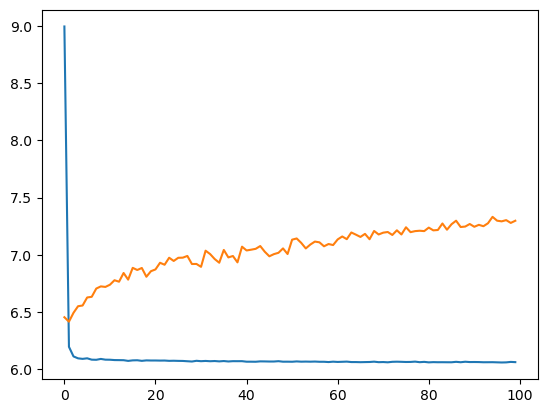

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [11]:
def generate_text(seed_text, next_words, model, tokenizer, sequence_length, temperature=1.4):
    result = [seed_text]
    in_text = seed_text

    for _ in range(next_words):
        # Encode the text as integer sequences
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = pad_sequences([encoded], maxlen=sequence_length, truncating='pre')

        # Predict the next word probabilities
        preds = model.predict(encoded, verbose=0)[0]

        # temperature
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)

        # Sample the next word index
        next_index = np.random.choice(len(preds), p=preds)
        predicted_word = tokenizer.index_word.get(next_index, '')

        # Append the predicted word to the input and result
        in_text += ' ' + predicted_word
        result.append(predicted_word)

    return ' '.join(result)

seed_text = "Want"
next_words = 100  # Number of words to generate
generated_text = generate_text(seed_text, next_words, model, tokenizer, sequence_length)
print(generated_text)

Want his a cold a hundred guess immediately puh slim new doc pretty rough flew induct other he's new vanvonderen him swirls lewinsky see person on easy shock next 'cause bedroom bedroom boy boy's 7 of dooma fuckin' lose up 3 rexha piggy wilson lee dove rappers pop new think up consideration lurkin' hop brat for no boy blows course verse yourself girl relayin' please valiums crowd favorite where shut still don't i fred nuisance channel voices man down house her meet it truthful no it globetrotter into love one must shadys loose teenagers believe eminem yella lottery gets shady and


In [12]:
import pyttsx3
engine = pyttsx3.init()
engine.setProperty('rate', 150)
engine.say(generated_text)
engine.runAndWait()

### EOF